# **RESNET-50 FOR X-RAY IMAGES**



In [2]:
from google.colab import drive #mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/full #unzipping dataset

Streaming output truncated to the last 5000 lines.
  inflating: full/train/normal/Normal-10010.png  
  inflating: __MACOSX/full/train/normal/._Normal-10010.png  
  inflating: full/train/normal/Normal-2408.png  
  inflating: __MACOSX/full/train/normal/._Normal-2408.png  
  inflating: full/train/normal/Normal-716.png  
  inflating: __MACOSX/full/train/normal/._Normal-716.png  
  inflating: full/train/normal/Normal-7564.png  
  inflating: __MACOSX/full/train/normal/._Normal-7564.png  
  inflating: full/train/normal/Normal-10004.png  
  inflating: __MACOSX/full/train/normal/._Normal-10004.png  
  inflating: full/train/normal/Normal-1883.png  
  inflating: __MACOSX/full/train/normal/._Normal-1883.png  
  inflating: full/train/normal/Normal-9575.png  
  inflating: __MACOSX/full/train/normal/._Normal-9575.png  
  inflating: full/train/normal/Normal-1897.png  
  inflating: __MACOSX/full/train/normal/._Normal-1897.png  
  inflating: full/train/normal/Normal-4737.png  
  inflating: __MACOSX/full

In [6]:
#importing required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
# keras.layers.normalization import BatchNormalization

In [7]:
import cv2
import pandas as pd
import os
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
#path for covid positive training images
a="/content/full/train/covid/"

In [9]:
images=[]
labels=[]

In [12]:
#preparing data for training
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA) #resizing
    except:
        break
        print("b")

    images.append(resized)
    labels.append("1")#1 for covid pos
    
for item in os.listdir("/content/full/train/normal"): #path for covid negative training data
    img = cv2.imread("/content/full/train/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break
    images.append(res)
    labels.append("0") #0 for covid neg

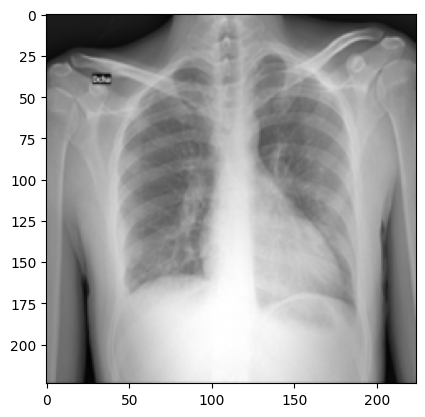

In [15]:
plt.imshow(images[1]) #plotting an image from the train set

In [16]:
images=np.asarray(images) # converting to array for further processing

In [17]:
images.shape

(3000, 224, 224, 3)

In [18]:
labels=np.asarray(labels)

In [19]:
trainy=labels.astype("uint8")

In [20]:
#creating a datframe of images and their corresponding labels to shuffle them in the next steps
df = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [21]:
from sklearn.utils import shuffle #shuffling the df
df = shuffle(df)

In [23]:
trainx=df["Image"] 

In [24]:
trainy=df["Label"]

In [25]:
trainx=np.asarray(trainx)

In [26]:
trainx.shape

(3000,)

In [27]:
trainx[0].shape

(224, 224, 3)

In [28]:
traindata=[]
for i in range (len(trainx)):
    trx=trainx[i]
    traindata.append(trx)

In [29]:
traindata=np.asarray(traindata) #converting back to array

In [30]:
traindata.shape

(3000, 224, 224, 3)

In [31]:
trainy=np.asarray(trainy) #converting back to array

In [32]:
trainy=trainy.astype("uint8")

In [33]:
print(trainy)

[1 0 1 ... 1 1 0]


In [34]:
import keras

In [35]:
#Using ResNet50 model (pre trained on ImageNet) with hyper parameter tuning
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
def create_model():
    base_model = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    output_layer = layers.Dense(1, activation='sigmoid')(x)
    model = keras.models.Model(inputs=base_model.input, outputs=output_layer)
    return model

def create_and_compile_model(learning_rate, batch_size):
    model = create_model()
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
#paramters for tuning
learning_rate = [0.0001, 0.001, 0.01] 
batch_size = [16, 32, 64]

model = KerasClassifier(build_fn=create_and_compile_model, verbose=0)
param_dist = dict(learning_rate=learning_rate,
                  batch_size=batch_size)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=4, cv=3)
random_search.fit(traindata, trainy)

print('Best score:', random_search.best_score_)
print('Best parameters:', random_search.best_params_)

<ipython-input-35-bf4366b7f5e3>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_and_compile_model, verbose=0)


94765736/94765736 [==============================] - 0s 0us/step


Best score: 0.5146666566530863
Best parameters: {'learning_rate': 0.001, 'batch_size': 32}


In [36]:
def create_model(learning_rate, batch_size):
    base_model = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    output_layer = layers.Dense(1, activation='sigmoid')(x)
    model = keras.models.Model(inputs=base_model.input, outputs=output_layer)

    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [37]:
#Using the best parameters to train the model
best_learning_rate = 0.001
best_batch_size = 32
model = create_model(best_learning_rate, best_batch_size)
model.fit(traindata, trainy, epochs=39, batch_size=best_batch_size)

Epoch 1/39
94/94 [==============================] - 67s 324ms/step - loss: 12.7891 - accuracy: 0.7603
Epoch 2/39
94/94 [==============================] - 30s 318ms/step - loss: 4.2413 - accuracy: 0.7723
Epoch 3/39
94/94 [==============================] - 29s 311ms/step - loss: 0.3203 - accuracy: 0.8950
Epoch 4/39
94/94 [==============================] - 30s 315ms/step - loss: 0.2155 - accuracy: 0.9470
Epoch 5/39
94/94 [==============================] - 30s 315ms/step - loss: 0.1094 - accuracy: 0.9603
Epoch 6/39
94/94 [==============================] - 30s 314ms/step - loss: 0.1647 - accuracy: 0.9550
Epoch 7/39
94/94 [==============================] - 30s 315ms/step - loss: 0.1105 - accuracy: 0.9747
Epoch 8/39
94/94 [==============================] - 30s 315ms/step - loss: 0.1010 - accuracy: 0.9703
Epoch 9/39
94/94 [==============================] - 30s 314ms/step - loss: 1.5617 - accuracy: 0.8447
Epoch 10/39
94/94 [==============================] - 30s 314ms/step - loss: 0.3468 - accur

In [38]:
a="/content/full/test/covid/"      #path for covid positive test images

In [ ]:
#repeating the steps above for the training set...

In [39]:
images=[] 
labels=[]

In [40]:
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)

    except:
        break
        print("b")
 
    images.append(resized)
    labels.append("1")
    
for item in os.listdir("/content/full/test/normal"): #path for covid neg test images
    img = cv2.imread("/content/full/test/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break

    images.append(res)
    labels.append("0")
    

In [41]:
images=np.asarray(images)

In [42]:
images.shape

(1000, 224, 224, 3)

In [43]:
labels=np.asarray(labels)

In [44]:
labels.shape

(1000,)

In [45]:
testy=labels.astype("uint8")

In [46]:
dframe = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [47]:
from sklearn.utils import shuffle 
dframe = shuffle(dframe) #shuffling test set

In [49]:
testx=dframe["Image"]  

In [50]:
testy=dframe["Label"]

In [51]:
testx=np.asarray(testx)

In [52]:
testdata=[]
for i in range(len(testx)):
  tsx=testx[i]
  testdata.append(tsx)

In [53]:
testdata=np.asarray(testdata)

In [54]:
testdata.shape

(1000, 224, 224, 3)

In [55]:
testy=np.asarray(testy)

In [56]:
testy=testy.astype("uint8")

In [58]:
#evaluating the model
score = model.evaluate(testdata, testy, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.15073570609092712
Test accuracy: 0.9700000286102295


In [59]:
#generating predictions
predictions = model.predict(testdata)

32/32 [==============================] - 4s 96ms/step


In [61]:
preds=[]
for i in range(len(predictions)):
  if(predictions[i]>=0.5):
    preds.append(int("1"))
  else:
    preds.append(int("0"))

In [62]:
preds=np.array(preds)

In [64]:
#counting misclassifications
ctr=0
for i in range(len(preds)):
  if(preds[i]!=testy[i]):
    ctr=ctr+1
print(ctr)

30


In [67]:
#performance metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [68]:
precision = precision_score(testy, preds)

In [69]:
print(precision) #precision

0.9681274900398407


In [70]:
matrix = confusion_matrix(testy, preds) #confusion matrix

In [71]:
print(matrix)

[[484  16]
 [ 14 486]]


In [72]:
recall = recall_score(testy, preds) #recall

In [73]:
print(recall)

0.972


In [74]:
f1=f1_score(testy, preds) #f1-score

In [75]:
print(f1)

0.9700598802395209


<Axes: >

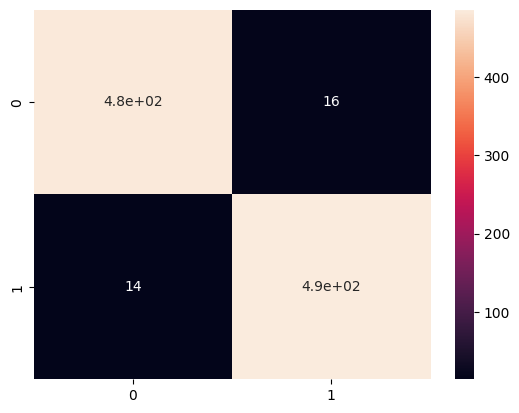

In [76]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

In [77]:
kappa = cohen_kappa_score(testy, preds) #cohen kappa score
print('Cohens kappa: %f' % kappa)


Cohens kappa: 0.940000
